In [ ]:
#@title
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Viewing closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


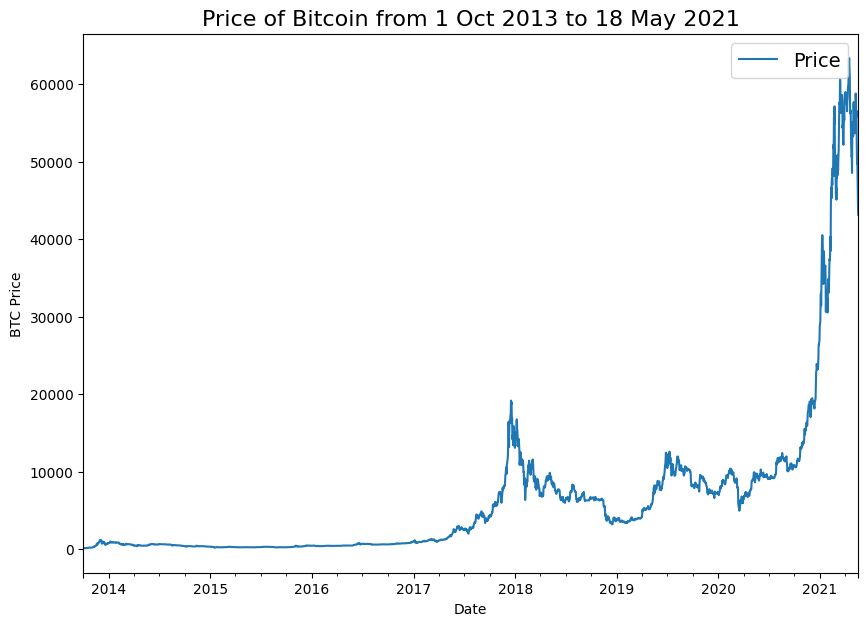

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]
     

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

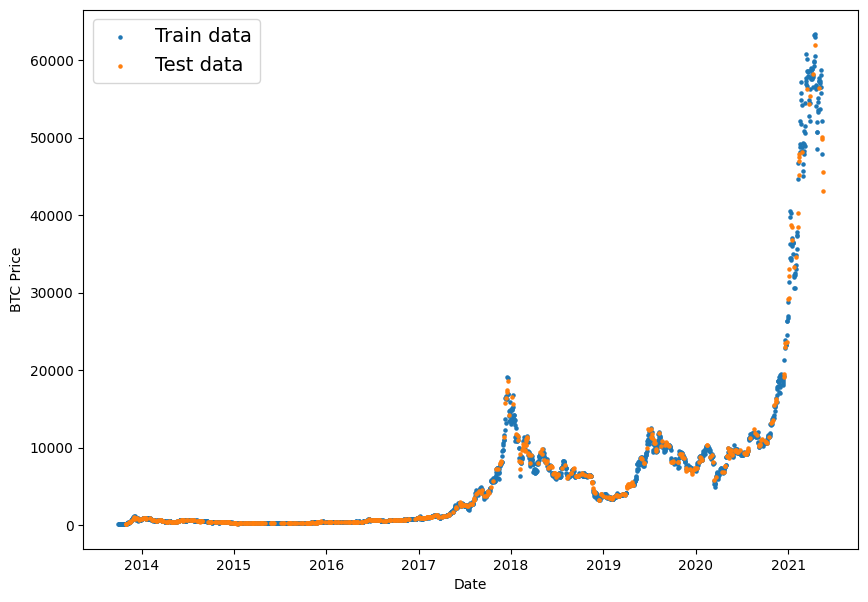

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();
     

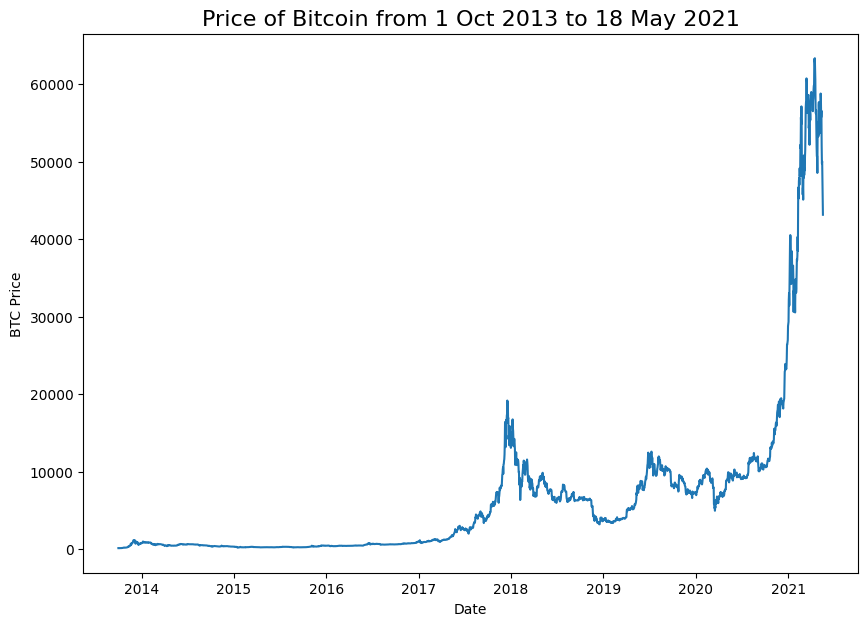

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [13]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (Before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     

(2229, 558, 2229, 558)

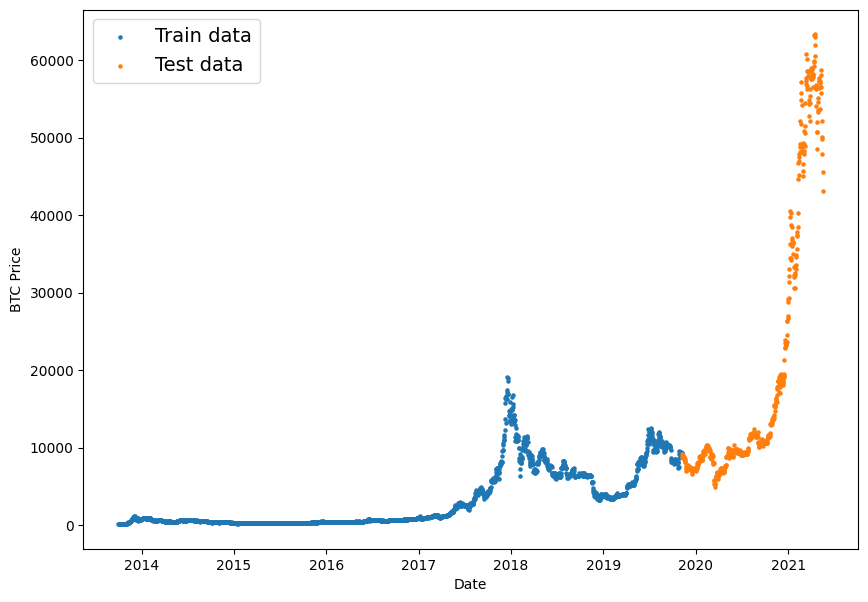

In [14]:
#plot 

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) 
  plt.grid(True)

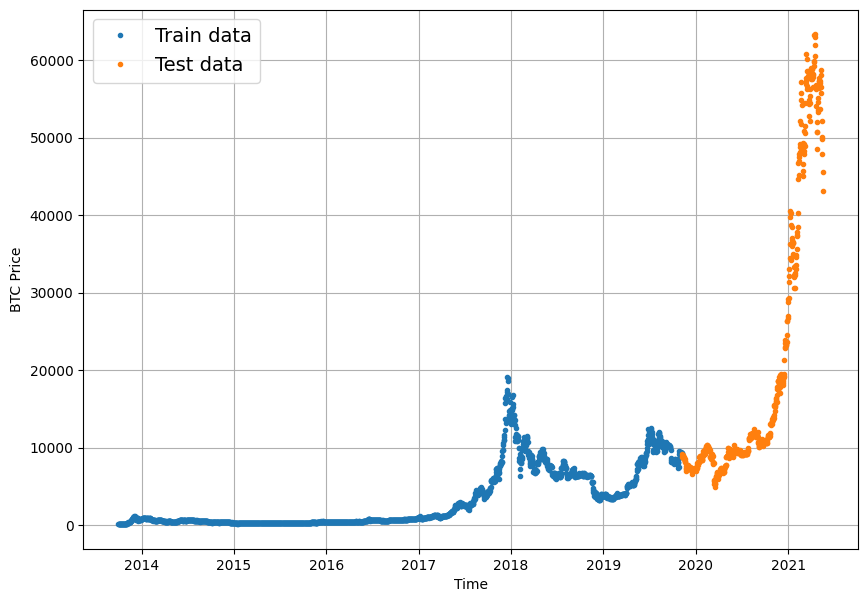

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Creating a Baseline Model 

In [17]:
# Creating the naïve forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

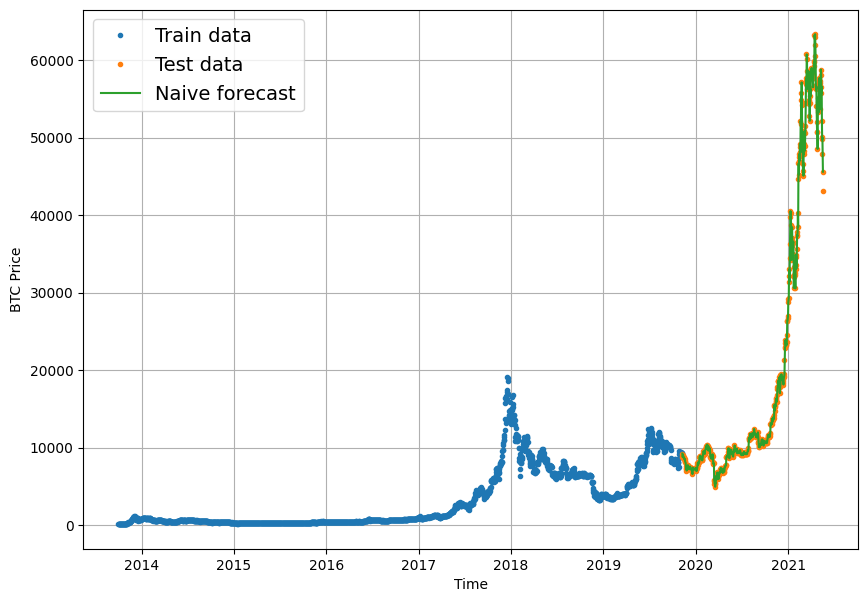

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
     


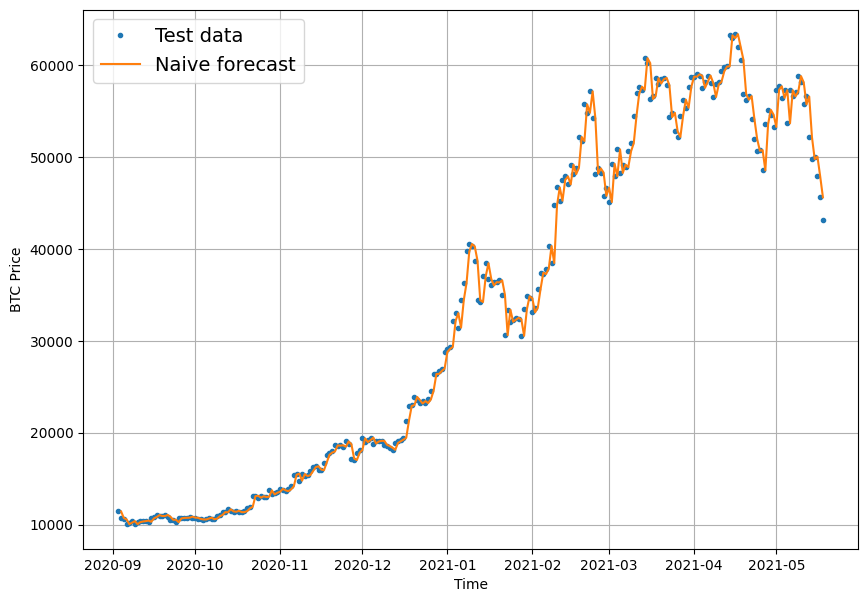

In [19]:
## Close up look at the plot
plt.figure(figsize=(10, 7))
offset = 300 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


In [20]:
# importing tensorflow
import tensorflow as tf

In [21]:
# Implement MASE (assuming no seasonality of data).

def mean_absolute_scaled_error(y_true, y_pred):
  
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Finding the MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [24]:
# Finding average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

In [25]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [26]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [28]:
def make_windows(x, window_size=7, horizon=1):

  # 1. Creating a window of specific window_size 
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Creating a 2D array of multiple window steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [29]:

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)     

(2780, 2780)

In [30]:
#  first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [31]:
# Last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [32]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels
     

In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2224, 556, 2224, 556)

In [34]:
train_windows[:5], train_labels[:5]
     

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Mondel Checkpoint

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True) 

In [37]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                       
], name="model_1_dense") 

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 
# Fit model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2230.0718 - mae: 2230.0718  

18/18 [==============================] - 7s 65ms/step - loss: 1832.8428 - mae: 1832.8428 - val_loss: 863.3727 - val_mae: 863.3727
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 337.7527 - mae: 337.7527 - val_loss: 1708.5409 - val_mae: 1708.5409
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 206.3669 - mae: 206.3669 - val_loss: 1007.6223 - val_mae: 1007.6223
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 168.5926 - mae: 168.5926

18/18 [==============================] - 1s 46ms/step - loss: 161.3565 - mae: 161.3565 - val_loss: 858.1548 - val_mae: 858.1548
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 153.0840 - mae: 153.0840 - val_loss: 878.1469 - val_mae: 878.1469
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 146.0679 - mae: 146.0679

18/18 [==============================] - 1s 44ms/step - loss: 149.5480 - mae: 149.5480 - val_loss: 842.1268 - val_mae: 842.1268
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 149.5111 - mae: 149.5111

18/18 [==============================] - 1s 42ms/step - loss: 145.4883 - mae: 145.4883 - val_loss: 804.0191 - val_mae: 804.0191
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 138.4138 - mae: 138.4138

18/18 [==============================] - 1s 44ms/step - loss: 142.6067 - mae: 142.6067 - val_loss: 784.0883 - val_mae: 784.0883
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 140.6729 - mae: 140.6729 - val_loss: 811.6282 - val_mae: 811.6282
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 135.6266 - mae: 135.6266

18/18 [==============================] - 1s 44ms/step - loss: 138.4145 - mae: 138.4145 - val_loss: 754.6326 - val_mae: 754.6326
Epoch 11/100
14/18 [======================>.......] - ETA: 0s - loss: 136.8023 - mae: 136.8023

18/18 [==============================] - 1s 45ms/step - loss: 134.3373 - mae: 134.3373 - val_loss: 748.9586 - val_mae: 748.9586
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 132.1229 - mae: 132.1229 - val_loss: 768.1177 - val_mae: 768.1177
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 132.1225 - mae: 132.1225 - val_loss: 753.1473 - val_mae: 753.1473
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 125.9530 - mae: 125.9530

18/18 [==============================] - 1s 31ms/step - loss: 129.0335 - mae: 129.0335 - val_loss: 730.1960 - val_mae: 730.1960
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 128.7245 - mae: 128.7245

18/18 [==============================] - 1s 30ms/step - loss: 127.1613 - mae: 127.1613 - val_loss: 704.3121 - val_mae: 704.3121
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2521 - mae: 124.2521 - val_loss: 706.6655 - val_mae: 706.6655
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3872 - mae: 111.3872

18/18 [==============================] - 1s 54ms/step - loss: 122.3414 - mae: 122.3414 - val_loss: 701.2141 - val_mae: 701.2141
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 126.2199 - mae: 126.2199

18/18 [==============================] - 1s 44ms/step - loss: 120.9849 - mae: 120.9849 - val_loss: 668.5458 - val_mae: 668.5458
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5535 - mae: 119.5535 - val_loss: 699.2931 - val_mae: 699.2931
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6866 - mae: 132.6866

18/18 [==============================] - 0s 28ms/step - loss: 118.9006 - mae: 118.9006 - val_loss: 651.7532 - val_mae: 651.7532
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 119.7987 - mae: 119.7987

18/18 [==============================] - 1s 30ms/step - loss: 120.6800 - mae: 120.6800 - val_loss: 649.6440 - val_mae: 649.6440
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 170.6575 - mae: 170.6575

18/18 [==============================] - 1s 31ms/step - loss: 117.5075 - mae: 117.5075 - val_loss: 631.2897 - val_mae: 631.2897
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 115.2537 - mae: 115.2537

18/18 [==============================] - 1s 30ms/step - loss: 116.2240 - mae: 116.2240 - val_loss: 626.6036 - val_mae: 626.6036
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 116.4362 - mae: 116.4362

18/18 [==============================] - 1s 29ms/step - loss: 115.0195 - mae: 115.0195 - val_loss: 617.9713 - val_mae: 617.9713
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1942 - mae: 113.1942 - val_loss: 619.1301 - val_mae: 619.1301
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 110.9223 - mae: 110.9223

18/18 [==============================] - 1s 29ms/step - loss: 114.5517 - mae: 114.5517 - val_loss: 607.3468 - val_mae: 607.3468
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 158.3562 - mae: 158.3562

18/18 [==============================] - 0s 29ms/step - loss: 113.8546 - mae: 113.8546 - val_loss: 603.6323 - val_mae: 603.6323
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 102.8704 - mae: 102.8704

18/18 [==============================] - 1s 31ms/step - loss: 111.2331 - mae: 111.2331 - val_loss: 602.5198 - val_mae: 602.5198
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6220 - mae: 111.6220 - val_loss: 610.0271 - val_mae: 610.0271
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0087 - mae: 126.0087

18/18 [==============================] - 1s 29ms/step - loss: 114.2866 - mae: 114.2866 - val_loss: 591.7909 - val_mae: 591.7909
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6804 - mae: 110.6804 - val_loss: 640.2568 - val_mae: 640.2568
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 116.7072 - mae: 116.7072

18/18 [==============================] - 1s 30ms/step - loss: 111.6246 - mae: 111.6246 - val_loss: 587.8552 - val_mae: 587.8552
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9115 - mae: 110.9115 - val_loss: 617.6581 - val_mae: 617.6581
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6143 - mae: 109.6143 - val_loss: 589.4177 - val_mae: 589.4177
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 99.6551 - mae: 99.6551

18/18 [==============================] - 1s 29ms/step - loss: 109.2455 - mae: 109.2455 - val_loss: 587.3362 - val_mae: 587.3362
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 154.1125 - mae: 154.1125

18/18 [==============================] - 1s 30ms/step - loss: 113.2085 - mae: 113.2085 - val_loss: 581.5346 - val_mae: 581.5346
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4067 - mae: 110.4067 - val_loss: 585.6703 - val_mae: 585.6703
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7752 - mae: 109.7752 - val_loss: 592.3241 - val_mae: 592.3241
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3938 - mae: 109.3938 - val_loss: 588.7632 - val_mae: 588.7632
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 108.0512 - mae: 108.0512

18/18 [==============================] - 0s 29ms/step - loss: 108.0512 - mae: 108.0512 - val_loss: 579.4388 - val_mae: 579.4388
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7088 - mae: 111.7088 - val_loss: 731.9448 - val_mae: 731.9448
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 124.1597 - mae: 124.1597

18/18 [==============================] - 1s 43ms/step - loss: 119.5089 - mae: 119.5089 - val_loss: 575.7819 - val_mae: 575.7819
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0379 - mae: 108.0379 - val_loss: 603.0963 - val_mae: 603.0963
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1030 - mae: 114.1030 - val_loss: 604.6282 - val_mae: 604.6282
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8623 - mae: 108.8623 - val_loss: 598.1069 - val_mae: 598.1069
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5828 - mae: 110.5828 - val_loss: 587.9009 - val_mae: 587.9009
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9361 - mae: 108.9361 - val_loss: 637.6193 - val_mae: 637.6193
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 108.4898 - mae: 108.4898

18/18 [==============================] - 1s 29ms/step - loss: 107.7837 - mae: 107.7837 - val_loss: 571.5224 - val_mae: 571.5224
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4282 - mae: 108.4282 - val_loss: 607.2626 - val_mae: 607.2626
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9505 - mae: 113.9505 - val_loss: 578.1705 - val_mae: 578.1705
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 89.5701 - mae: 89.5701

18/18 [==============================] - 1s 33ms/step - loss: 107.4351 - mae: 107.4351 - val_loss: 571.3749 - val_mae: 571.3749
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9313 - mae: 108.9313 - val_loss: 586.3687 - val_mae: 586.3687
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6936 - mae: 109.6936 - val_loss: 617.3145 - val_mae: 617.3145
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0350 - mae: 113.0350 - val_loss: 643.0696 - val_mae: 643.0696
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6838 - mae: 112.6838 - val_loss: 598.7588 - val_mae: 598.7588
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0171 - mae: 107.0171 - val_loss: 739.9512 - val_mae: 739.9511
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 121.4988 - mae: 121.4988 - val_loss: 693.8303 - val_mae: 693.8303
Epoch 58/100
14/18 [============

18/18 [==============================] - 1s 39ms/step - loss: 114.8226 - mae: 114.8226 - val_loss: 569.2502 - val_mae: 569.2502
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8883 - mae: 106.8883 - val_loss: 579.4123 - val_mae: 579.4123
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6558 - mae: 109.6558 - val_loss: 612.5533 - val_mae: 612.5533
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8750 - mae: 107.8750 - val_loss: 583.0793 - val_mae: 583.0793
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8651 - mae: 106.8651 - val_loss: 578.5391 - val_mae: 578.5391
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6057 - mae: 108.6057 - val_loss: 630.2557 - val_mae: 630.2557
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0953 - mae: 109.0953 - val_loss: 582.4731 - val_mae: 582.4731
Epoch 65/100
18/18 [============

18/18 [==============================] - 0s 29ms/step - loss: 107.7198 - mae: 107.7198 - val_loss: 566.2101 - val_mae: 566.2101
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6308 - mae: 109.6308 - val_loss: 599.0785 - val_mae: 599.0785
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 168.9079 - mae: 168.9079

18/18 [==============================] - 0s 28ms/step - loss: 105.9525 - mae: 105.9525 - val_loss: 566.1960 - val_mae: 566.1960
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5153 - mae: 107.5153 - val_loss: 584.3380 - val_mae: 584.3380
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 77.6975 - mae: 77.6975

18/18 [==============================] - 1s 29ms/step - loss: 107.9028 - mae: 107.9028 - val_loss: 565.9883 - val_mae: 565.9883
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9347 - mae: 106.9347 - val_loss: 584.1823 - val_mae: 584.1823
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0533 - mae: 107.0533 - val_loss: 579.2911 - val_mae: 579.2911
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9375 - mae: 106.9375 - val_loss: 588.8824 - val_mae: 588.8824
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0037 - mae: 107.0037 - val_loss: 573.7895 - val_mae: 573.7895
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.4813 - mae: 94.4813

18/18 [==============================] - 1s 29ms/step - loss: 105.5185 - mae: 105.5185 - val_loss: 564.0020 - val_mae: 564.0020
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7123 - mae: 114.7123 - val_loss: 572.8218 - val_mae: 572.8218
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3079 - mae: 109.3079 - val_loss: 650.6802 - val_mae: 650.6802
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3115 - mae: 110.3115 - val_loss: 569.2737 - val_mae: 569.2737
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 105.6377 - mae: 105.6377 - val_loss: 574.3837 - val_mae: 574.3837
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8416 - mae: 106.8416 - val_loss: 579.2670 - val_mae: 579.2670
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 105.0868 - mae: 105.0868 - val_loss: 580.0997 - val_mae: 580.0997
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 29ms/step - loss: 106.8770 - mae: 106.8770 - val_loss: 563.3081 - val_mae: 563.3081
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9012 - mae: 117.9012 - val_loss: 653.4202 - val_mae: 653.4202


In [38]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 653.4203 - mae: 653.4203


[653.4202880859375, 653.4202880859375]

In [39]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)
     


18/18 [==============================] - 0s 2ms/step - loss: 563.3081 - mae: 563.3081


[563.30810546875, 563.30810546875]

# Forcasting Models wth Test Dataset

In [40]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) 

In [41]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8848.848, 8772.752, 9033.423, 8787.913, 8741.027, 8737.083,
        8677.403, 8533.295, 8452.076, 8530.279], dtype=float32)>)

In [42]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 563.3081,
 'mse': 1158012.0,
 'rmse': 1076.1096,
 'mape': 2.5269578,
 'mase': 0.98957634}

In [43]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

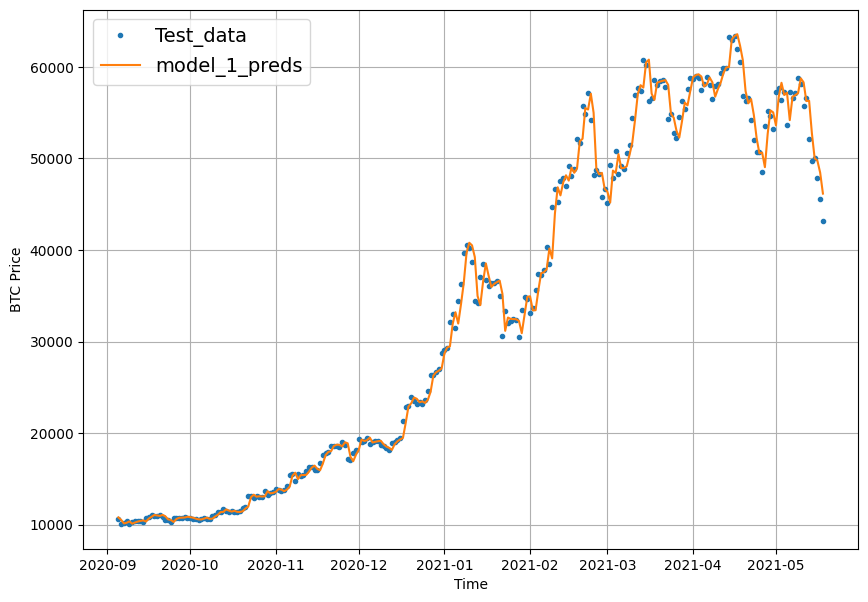

In [44]:
#Plotting
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# Second Model 

In [45]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [46]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [47]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2205, 552, 2205, 552)

In [48]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [49]:

model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 687.3615


687.3614501953125

In [50]:
# Loading in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 596.4838


596.4838256835938

In [51]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [52]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results
     

{'mae': 596.4838,
 'mse': 1244846.1,
 'rmse': 1115.7267,
 'mape': 2.7058904,
 'mase': 1.0426596}

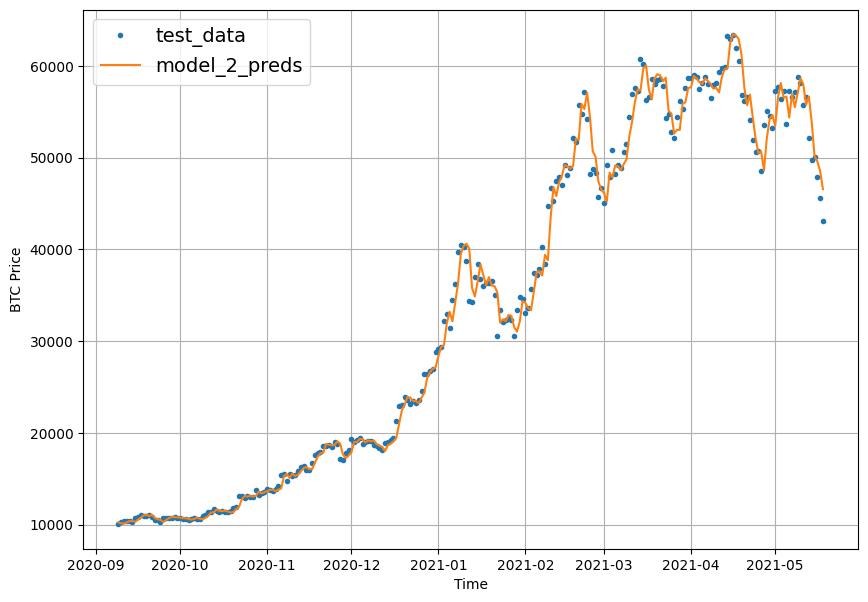

In [53]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 
     

# Model 3

In [54]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
     

(2751, 2751)

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [57]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1365.5930


1365.593017578125

In [58]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1216.8207


1216.8206787109375

In [59]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]


18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9214.734 , 9378.125 , 9323.488 , 9548.028 , 9329.389 , 9448.9375,
        9436.651 ],
       [9002.853 , 8979.175 , 8908.677 , 9039.608 , 9084.336 , 9310.412 ,
        9318.402 ],
       [8944.211 , 8854.3955, 8829.754 , 8839.569 , 9065.036 , 9024.389 ,
        9336.041 ],
       [9072.333 , 9015.518 , 8991.08  , 9073.489 , 9346.682 , 9208.043 ,
        9378.779 ],
       [8863.774 , 8976.221 , 8736.049 , 9056.496 , 9143.159 , 8979.914 ,
        9026.531 ]], dtype=float32)>

In [60]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 589.5498  ,  369.81375 ,  319.6197  ,  528.5374  ,  414.53    ,
         527.8473  ,  599.5632  ,  484.44357 ,  487.926   ,  550.90594 ,
         824.9253  ,  829.00824 ,  780.4045  ,  828.2519  ,  585.4492  ,
         170.51549 ,  188.32777 ,  275.39453 ,  240.3178  ,  270.71344 ,
         173.13742 ,  254.54031 ,  388.12054 ,  349.05566 ,  232.36412 ,
         185.7018  ,  140.48264 ,  150.77713 ,  131.21658 ,  184.84508 ,
         292.55176 ,  342.07135 ,  304.3641  ,  306.40933 ,  274.51596 ,
         307.80197 ,  320.67584 ,  222.53195 ,  225.75461 ,  224.5134  ,
         522.9174  ,   58.007534,   49.308735,   80.62221 ,  139.816   ,
          63.743233,   75.10868 ,  106.26005 ,  111.85296 ,  140.58391 ,
         111.1628  ,   95.23389 ,  169.02895 ,  173.45396 ,  269.59848 ,
         349.62283 ,  557.1669  ,  496.08768 ,  501.5394  ,  574.2847  ,
         303.40744 ,  251.68547 ,  253.4774  ,  329.72397 ,  398.92328 ,
         405.73618 ,  477.0886  ,  524.3608 

In [61]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  
  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1216.8206,
 'mse': 5196729.5,
 'rmse': 1400.9237,
 'mape': 5.464274,
 'mase': 2.1652641}

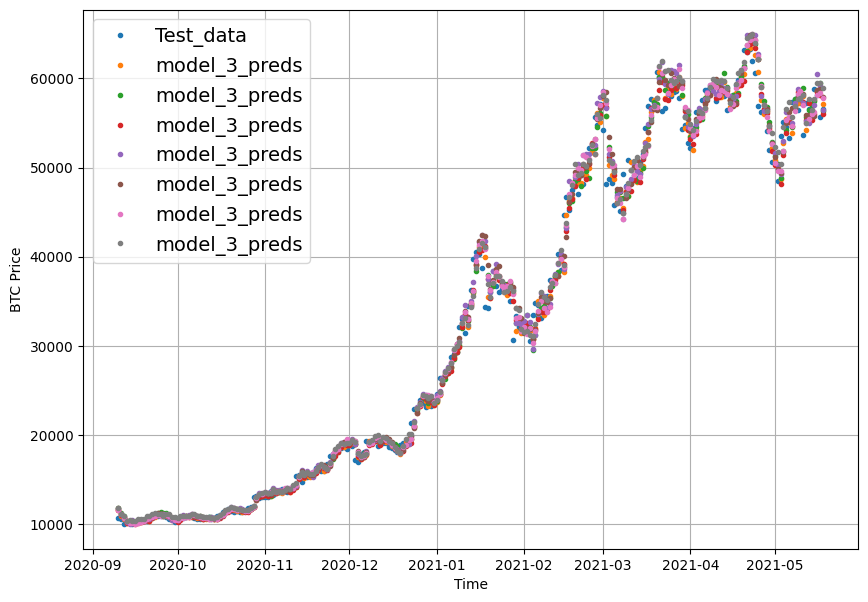

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results 
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

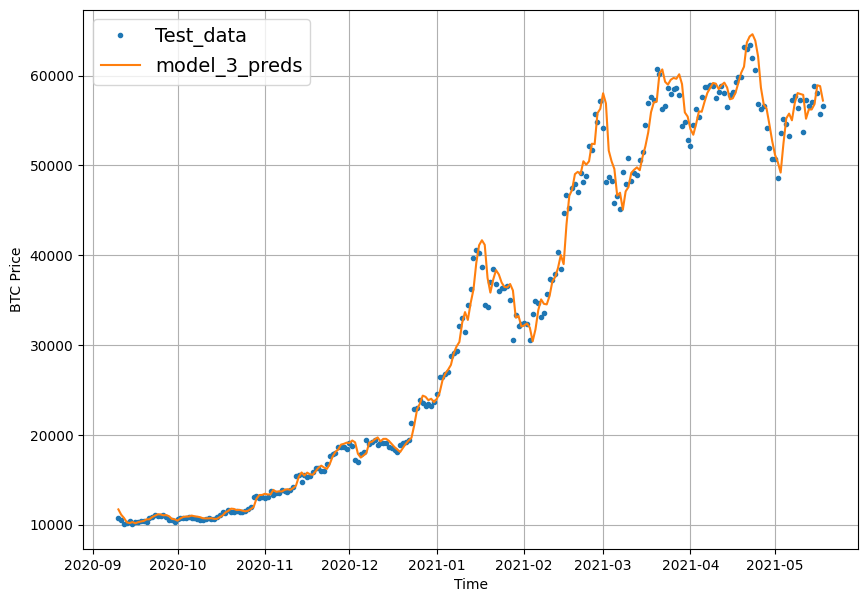

In [64]:
#plot
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")
     

# Comparing Models

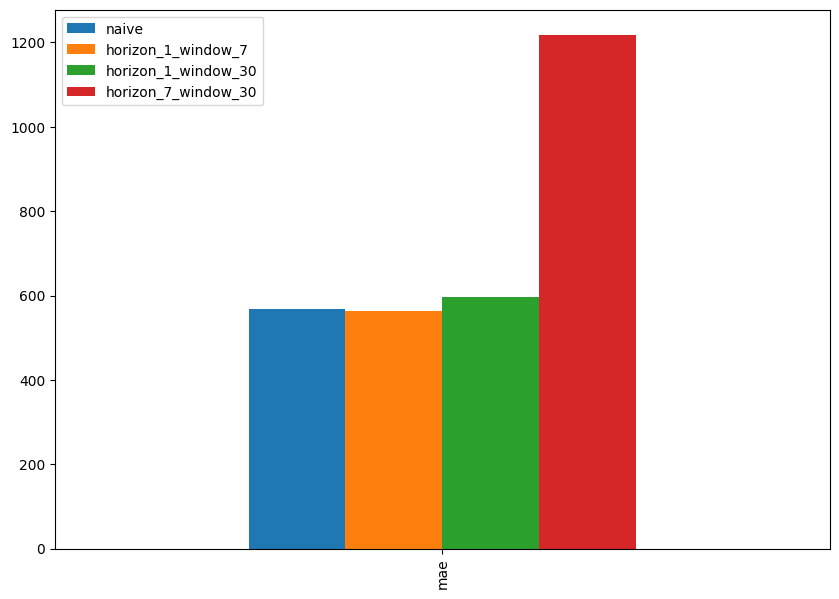

In [65]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");
     

In [66]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [67]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [68]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [69]:
train_windows[0].shape 

(7,)

In [70]:
# In order to ensure functionality, we must modify the structure of our data before feeding it into the Conv1D layer.
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) 
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [71]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])
     

In [72]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 568.4490


568.448974609375

In [74]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8860.03 , 8791.164, 9001.795, 8762.01 , 8754.612, 8722.518,
       8656.407, 8533.497, 8451.538, 8510.6  ], dtype=float32)>

In [75]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.449,
 'mse': 1167223.0,
 'rmse': 1080.381,
 'mape': 2.5334837,
 'mase': 0.9986074}

# Recurent Neural Net

In [76]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [77]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 582.4414


582.44140625

In [78]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]
     

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8931.522, 8820.105, 9005.997, 8783.279, 8786.435, 8784.359,
       8693.348, 8559.405, 8500.603, 8534.153], dtype=float32)>

In [79]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results
     

{'mae': 582.4414,
 'mse': 1213516.4,
 'rmse': 1101.5972,
 'mape': 2.6278117,
 'mase': 1.0231882}

In [80]:
# Multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [81]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) 
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [82]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days     


(1012, 2414)

In [83]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


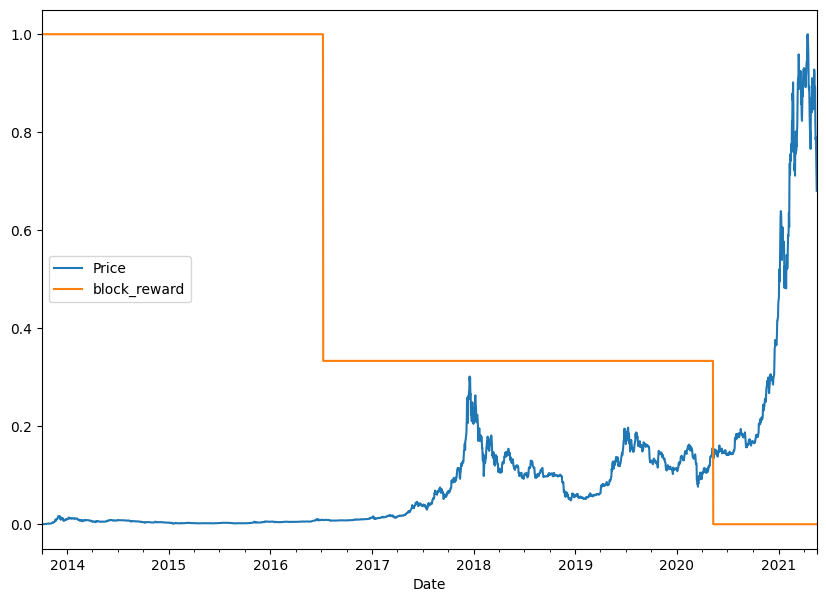

In [84]:
# Plot the block reward/price over time
# Note: different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), 
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

# Windowed dataset

In [85]:
HORIZON = 1
WINDOW_SIZE = 7

In [86]:
# Makeing a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [87]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [88]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [89]:
# training and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
     


(2224, 2224, 556, 556)

In [90]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [91]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)
     


18/18 [==============================] - 0s 2ms/step - loss: 562.7571


562.757080078125

In [92]:
# Making predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8855.738, 8787.653, 9039.792, 8775.015, 8749.912, 8741.876,
       8686.571, 8516.773, 8470.993, 8530.456], dtype=float32)>

In [93]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 562.7571,
 'mse': 1152279.2,
 'rmse': 1073.4427,
 'mape': 2.50901,
 'mase': 0.9886083}

In [94]:
model_1_results     


{'mae': 563.3081,
 'mse': 1158012.0,
 'rmse': 1076.1096,
 'mape': 2.5269578,
 'mase': 0.98957634}

# Traing and Evaluting new Models with the N_BEATS alogrithm

In [95]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): 
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): 
    x = inputs 
    for layer in self.hidden: 
      x = layer(x)
    theta = self.theta_layer(x) 
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [96]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [97]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) 
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [98]:


# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")
     


Backcast: [-1.0612488   0.46752626 -0.42706427 -0.20413554 -0.55422014 -0.32103083
 -0.27921593]
Forecast: 0.2881496846675873


In [99]:
HORIZON = 1
WINDOW_SIZE = 7 
     

In [100]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [101]:


# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()
     


,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [102]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [103]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combineing features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [104]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [105]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")
     

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [106]:


tf.random.set_seed(42)

#  Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

#  input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")
# initial backcast and forecast input 
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

 # Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) 

  # Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

#  Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

#  Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

#  Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
     


Epoch 203: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 303: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [107]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 574.2568 - mae: 574.2568 - mse: 1132843.8750


[574.2567749023438, 574.2567749023438, 1132843.875]

In [108]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8848.398, 8808.968, 8996.201, 8829.513, 8755.089, 8759.506,
       8662.416, 8544.322, 8496.71 , 8531.769], dtype=float32)>

In [109]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 574.2568,
 'mse': 1132843.9,
 'rmse': 1064.3513,
 'mape': 2.6394515,
 'mase': 1.00881}

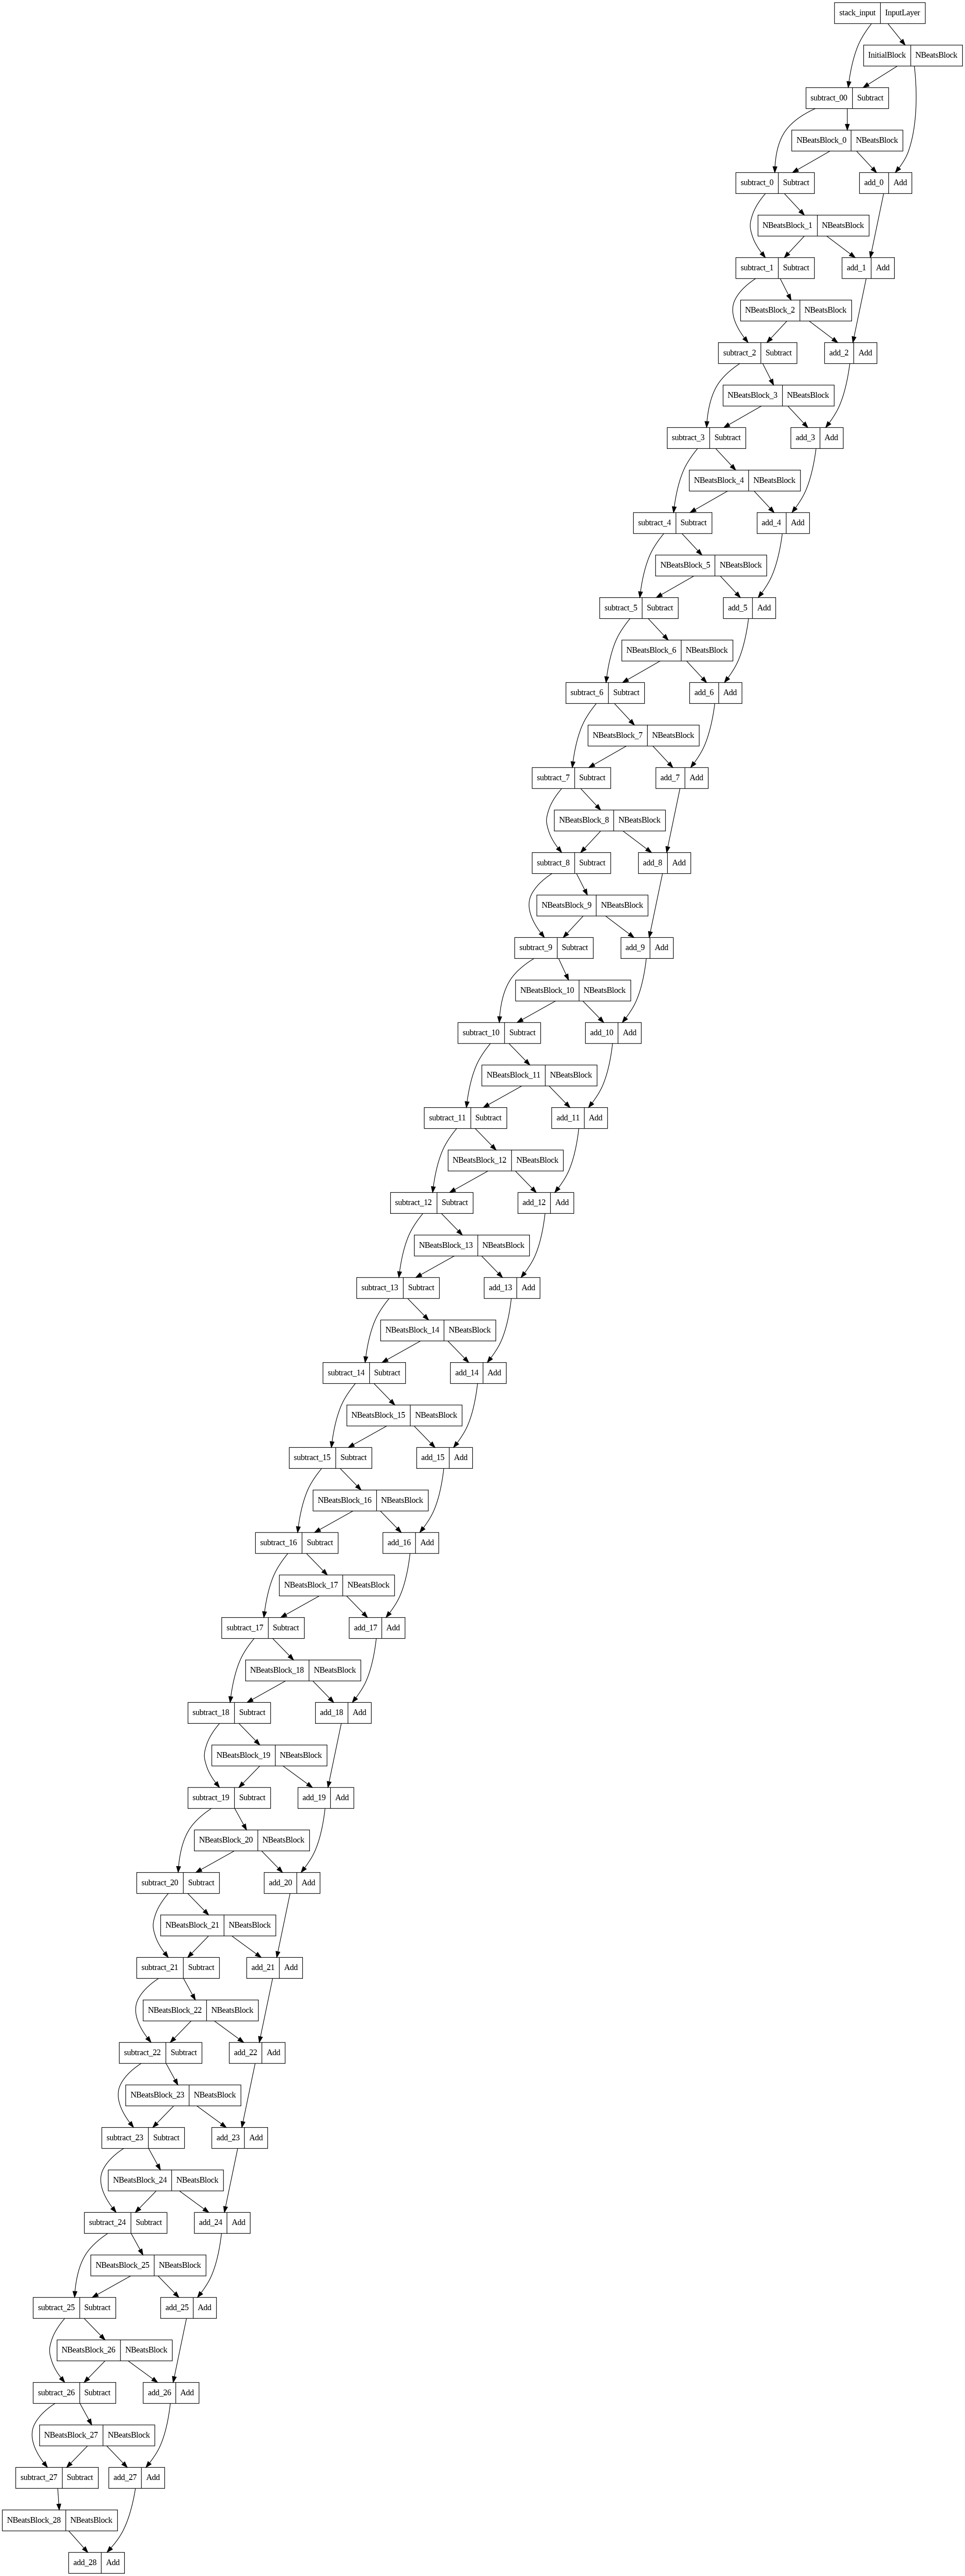

In [110]:
#plotting 
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [111]:
model_7.save(model_7.name)

# Constructing and fitting prevouise models
Planning on doing this using different loss functions

In [113]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
 
  # Makeing empty list for trained ensemble models
  ensemble_models = []

  # Creating num_iter number of models per loss function
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,   
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

In [114]:
%%time

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 404: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 413: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 513: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 241: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 553: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 653: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 385: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 827: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 927: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing 

In [116]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) 
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [117]:
# list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds
     

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 107ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8763.8125,  8715.822 ,  9137.237 , ..., 50505.71  , 48786.05  ,
        46051.746 ],
       [ 8828.901 ,  8864.226 ,  9035.449 , ..., 50152.04  , 47872.848 ,
        45673.348 ],
       [ 8788.827 ,  8762.812 ,  9047.319 , ..., 50059.918 , 47773.63  ,
        45719.88  ],
       ...,
       [ 8819.108 ,  8826.937 ,  9091.48  , ..., 49601.64  , 47888.54  ,
        46095.13  ],
       [ 8779.209 ,  8709.514 ,  9042.293 , ..., 49764.57  , 48731.246 ,
        46223.684 ],
       [ 8796.311 ,  8781.905 ,  9073.851 , ..., 49851.066 , 47823.918 ,
        45524.08  ]], dtype=float32)>

In [118]:
# Evaluating ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) 
ensemble_results

{'mae': 570.0069,
 'mse': 1146550.8,
 'rmse': 1070.7711,
 'mape': 2.5886936,
 'mase': 1.0013442}

# Bootstrap the Models


In [119]:
def get_upper_lower(preds): 
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

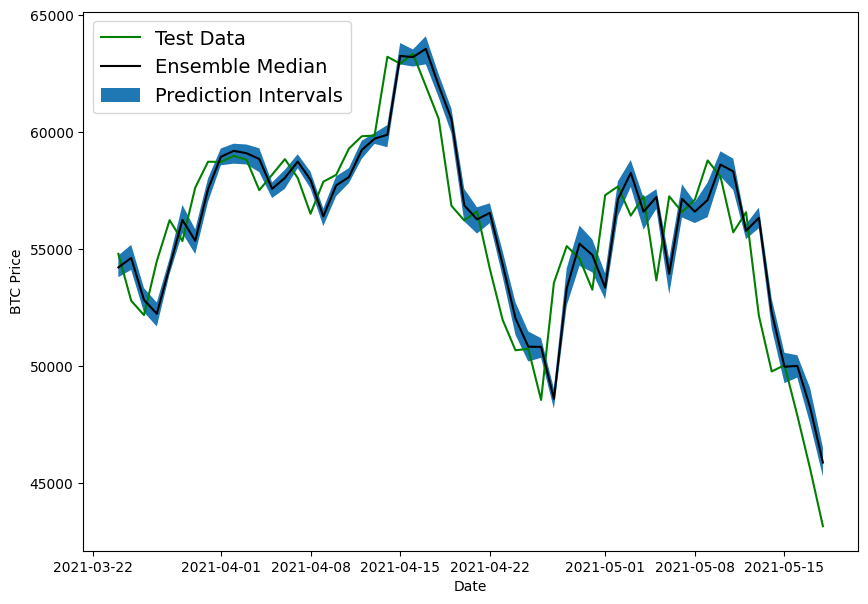

In [120]:
#plot
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

# Training the model tot make preditctions for the next day 

In [121]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [122]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() 
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
     


In [123]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combineing features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))


BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [125]:

tf.random.set_seed(42)

# Created model 
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) 

In [126]:
INTO_FUTURE = 14

In [127]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:] 

  for _ in range(into_future):
    
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    future_forecast.append(tf.squeeze(future_pred).numpy())
    
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [128]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 58ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55103.38671875

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55103.38671875] -> Prediction: 51787.6328125

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55103.38671875 51787.6328125 ] -> Prediction: 50627.8828125

1/1 [==============================] - 0s 35ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55103.38671875 51787.6328125  50627.8828125 ] -> Prediction: 48245.08203125

1/1 [==============================] - 0s 64ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55103.38671875
 51787.6328125  50627.8828125  48245.082

In [129]:
future_forecast[:10]

[55103.387,
 51787.633,
 50627.883,
 48245.082,
 45243.062,
 47497.41,
 48107.883,
 54827.258,
 51356.996,
 49290.64]

# Ploting the future

In [130]:
def get_future_dates(start_date, into_future, offset=1):
 
  start_date = start_date + np.timedelta64(offset, "D") 
  end_date = start_date + np.timedelta64(into_future, "D") 
  return np.arange(start_date, end_date, dtype="datetime64[D]") 

In [131]:

last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [132]:
# next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [133]:
# last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast
     

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55103.387, 51787.633, 50627.883, 48245.082, 45243.062,
        47497.41 , 48107.883, 54827.258, 51356.996, 49290.64 , 46879.133,
        45701.32 , 49928.492, 51049.766], dtype=float32))

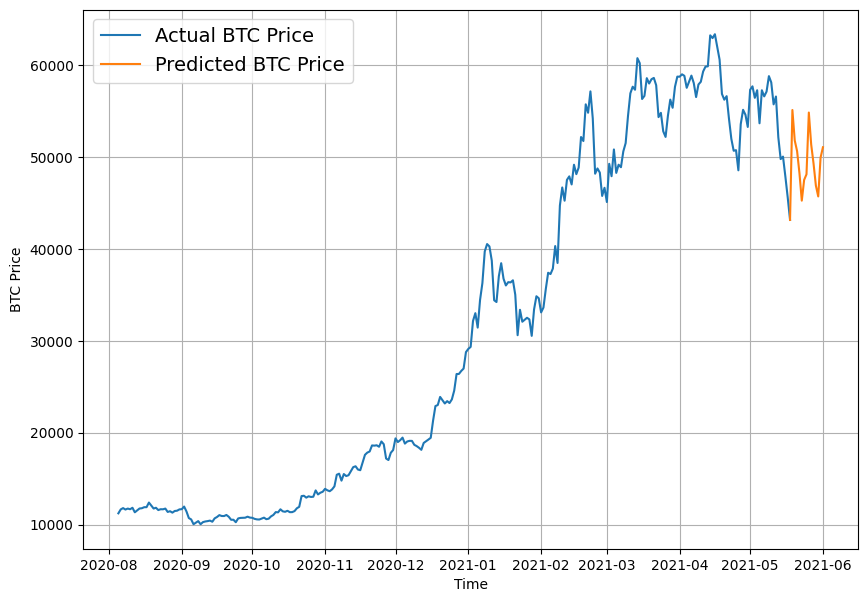

In [134]:
# Plot 
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")